# Annual Household Income

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project simulates various demographic and socioeconomic factors that influence annual household income


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/stealthtechnologies/regression-dataset-for-household-income-analysis
- The data consists of 14 column and 10000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/data.csv')

#### Show Top 5 Records

In [3]:
df.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


#### Shape of the dataset

In [4]:
df.shape

(10000, 14)

#### 2.2 Dataset information

- Age: Age of the primary household member (18 to 70 years).

- Education Level: Highest education level attained (High School, Bachelor's, Master's, Doctorate).

- Occupation: Type of occupation (Healthcare, Education, Technology, Finance, Others).

- Number of Dependents: Number of dependents in the household (0 to 5).

- Location: Residential location (Urban, Suburban, Rural).

- Work Experience: Years of work experience (0 to 50 years).

- Marital Status: Marital status of the primary household member (Single, Married, Divorced).

- Employment Status: Employment status of the primary household member (Full-time, Part-time, Self-employed).

- Household Size: Total number of individuals living in the household (1 to 7).

- Homeownership Status: Homeownership status (Own, Rent).

- Type of Housing: Type of housing (Apartment, Single-family home, Townhouse).

- Gender: Gender of the primary household member (Male, Female).

- Primary Mode of Transportation: Primary mode of transportation used by the household member
(Car, Public transit, Biking, Walking).

- Income: Actual annual household income

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

#### There are no duplicates values in the data set

### 3.3 Check data types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

Age                                 53
Education_Level                      4
Occupation                           5
Number_of_Dependents                 6
Location                             3
Work_Experience                     51
Marital_Status                       3
Employment_Status                    3
Household_Size                       7
Homeownership_Status                 2
Type_of_Housing                      3
Gender                               2
Primary_Mode_of_Transportation       4
Income                            7667
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,Age,Number_of_Dependents,Work_Experience,Household_Size,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,44.021700,2.527000,24.858800,3.989600,8.168382e+05
std,15.203998,1.713991,14.652622,2.010496,1.821089e+06
min,18.000000,0.000000,0.000000,1.000000,3.104400e+04
25%,31.000000,1.000000,12.000000,2.000000,6.844600e+04
50%,44.000000,3.000000,25.000000,4.000000,7.294300e+04
75%,57.000000,4.000000,37.000000,6.000000,3.506675e+05
max,70.000000,5.000000,50.000000,7.000000,9.992571e+06


#### Insights
- Income Inequality: The average income is \$816,838, but the median is only \$72,943, indicating significant income disparity.
- Few Dependents: Most households have 3 or fewer dependents, with an average of 2.53.
- Work Experience: The average work experience is 24.86 years, with a median of 25 years, indicating a mostly mid-career workforce.

### 3.7 Exploring Data

In [10]:
df.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [11]:
print("Categories in 'Education_Level' variable: ",end=" " )
print(df['Education_Level'].unique())

print("Categories in 'Occupation' variable: ",end=" ")
print(df['Occupation'].unique())

print("Categories in 'Location' variable: ",end=" " )
print(df['Location'].unique())

print("Categories in 'Marital_Status' variable: ",end=" " )
print(df['Marital_Status'].unique())

print("Categories in 'Employment_Status' variable: ",end=" " )
print(df['Employment_Status'].unique())

print("Categories in 'Type_of_Housing' variable: ",end=" " )
print(df['Type_of_Housing'].unique())

print("Categories in 'Gender' variable: ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Primary_Mode_of_Transportation' variable: ",end=" " )
print(df['Primary_Mode_of_Transportation'].unique())

Categories in 'Education_Level' variable:  ["Master's" 'High School' "Bachelor's" 'Doctorate']
Categories in 'Occupation' variable:  ['Technology' 'Finance' 'Others' 'Education' 'Healthcare']
Categories in 'Location' variable:  ['Urban' 'Rural' 'Suburban']
Categories in 'Marital_Status' variable:  ['Married' 'Single' 'Divorced']
Categories in 'Employment_Status' variable:  ['Full-time' 'Self-employed' 'Part-time']
Categories in 'Type_of_Housing' variable:  ['Apartment' 'Single-family home' 'Townhouse']
Categories in 'Gender' variable:  ['Male' 'Female']
Categories in 'Primary_Mode_of_Transportation' variable:  ['Public transit' 'Biking' 'Car' 'Walking']


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size', 'Income']

We have 9 categorical features : ['Education_Level', 'Occupation', 'Location', 'Marital_Status', 'Employment_Status', 'Homeownership_Status', 'Type_of_Housing', 'Gender', 'Primary_Mode_of_Transportation']


In [14]:
sns.set_style("whitegrid")

### 4. Exploring Data ( Visualization )
### 4.1 Univariate Analysis

*Analyzing individual variables to understand their distribution*

- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Numerical Feature Distributions

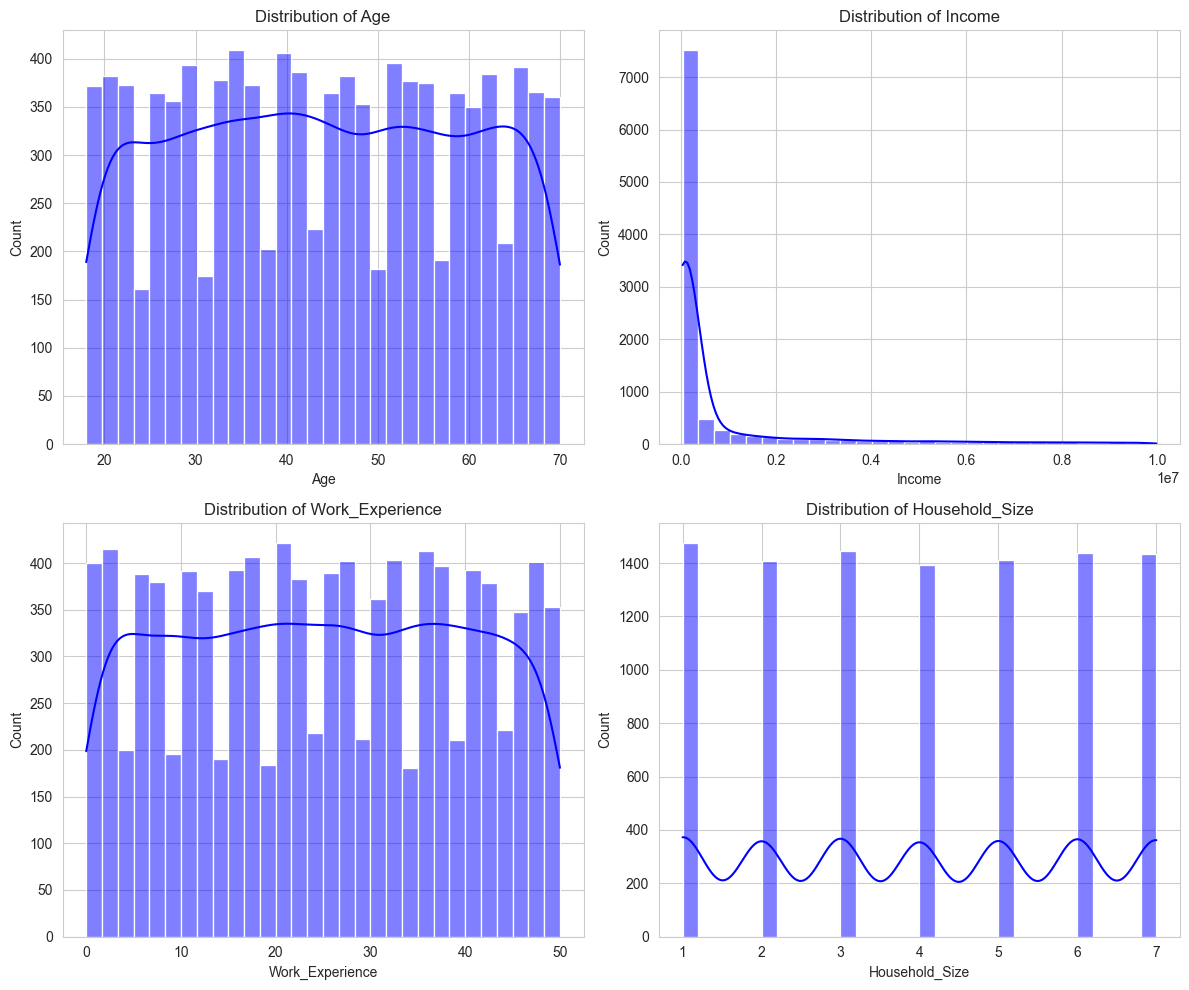

In [15]:
num_cols = ["Age", "Income", "Work_Experience", "Household_Size"]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i//2, i%2], color="blue")
    axes[i//2, i%2].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

#### 4.1.2 Categorical Feature Distribution

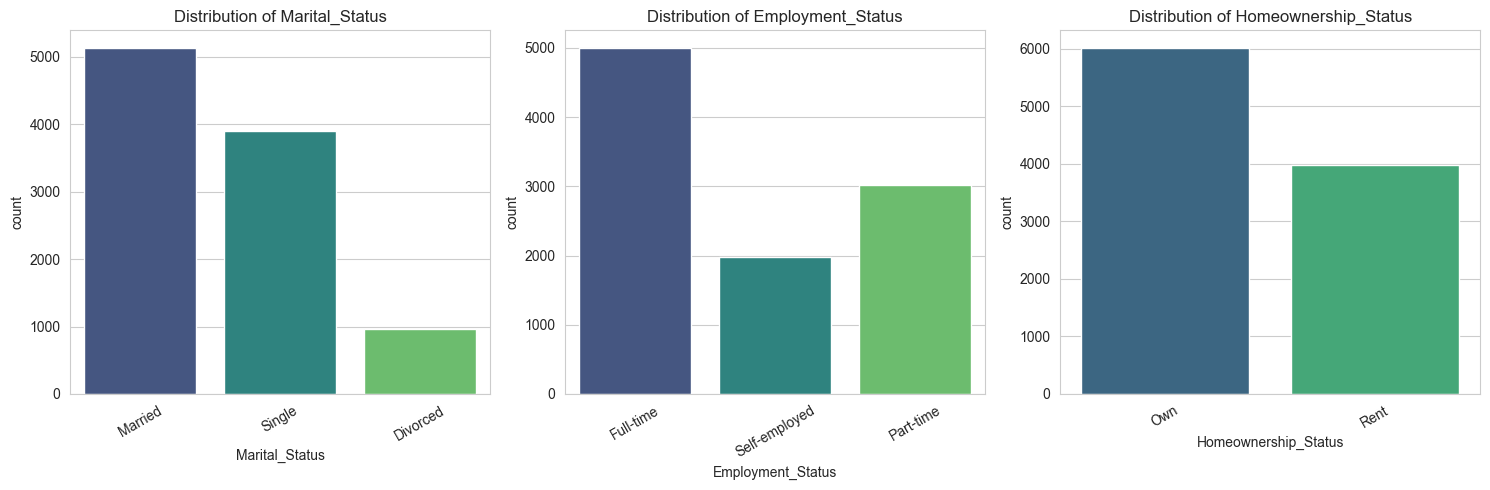

In [16]:
cat_cols = ["Marital_Status", "Employment_Status", "Homeownership_Status"]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis="x", rotation=30)

plt.tight_layout()
plt.show()

#### 🔍 Insights:

- **Marital Status:** Most individuals are married, followed by single, while divorced individuals are the least in number.
- **Employment Status:** A majority of individuals are employed full-time, while part-time and self-employed individuals make up a smaller portion.
- **Homeownership Status:** More individuals own their homes compared to those who rent, but renting is still a significant portion

### 4.2 Bivariate Analysis. 

**Objective:**
- Analyze relationships between two variables to identify patterns.

#### 4.2.1 Income vs. Categorical Variables

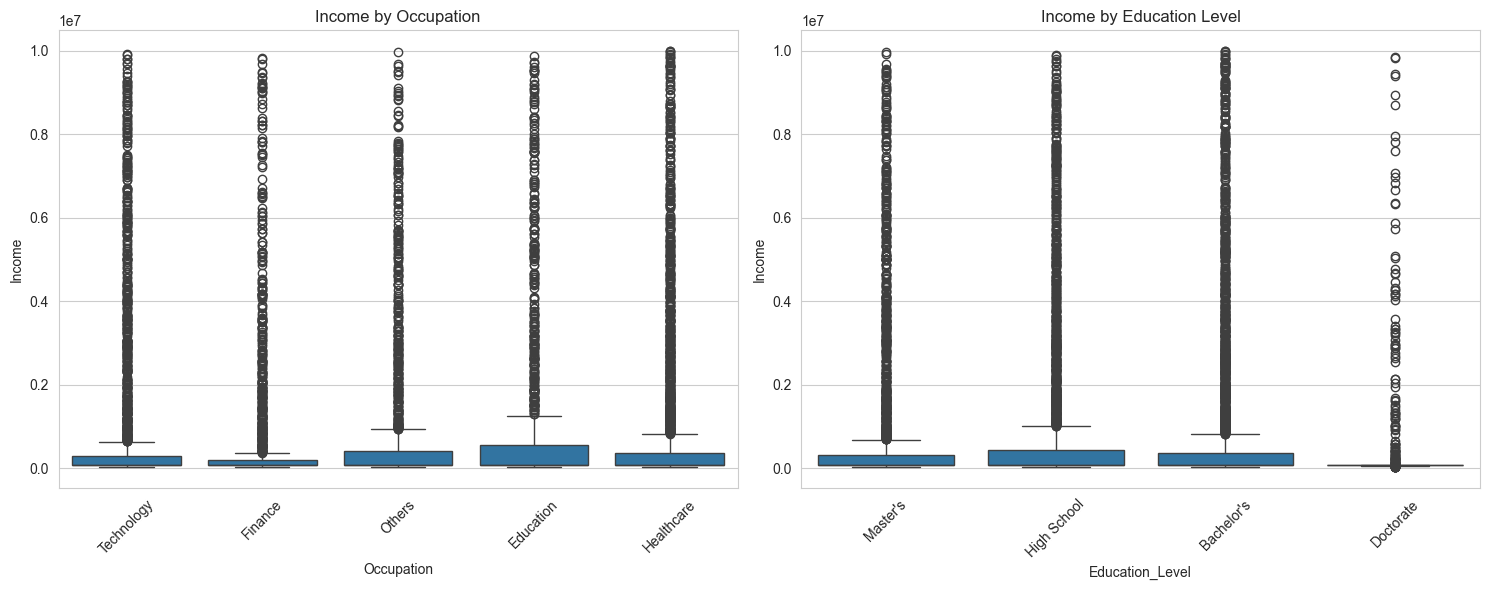

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Income by Occupation
sns.boxplot(x="Occupation", y="Income", data=df, ax=axes[0])
axes[0].set_title("Income by Occupation")
axes[0].tick_params(axis="x", rotation=45)

# Income by Education Level
sns.boxplot(x="Education_Level", y="Income", data=df, ax=axes[1])
axes[1].set_title("Income by Education Level")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

#### 🔍 Insights:

**Occupations:**

- Similar median incomes across fields, with Education and Healthcare slightly higher
- Tech and Finance show more extreme high-income outliers
- All fields have significant income variability

**Education Levels:**

- Clear income progression from High School → Bachelor's → Doctorate
- Doctorate holders have most consistent incomes (least variation)
- Bachelor's degree shows many high-income outliers despite being lower education level
- Higher education correlates with higher minimum incomes

#### 4.2.2 Correlation Between Numerical Features

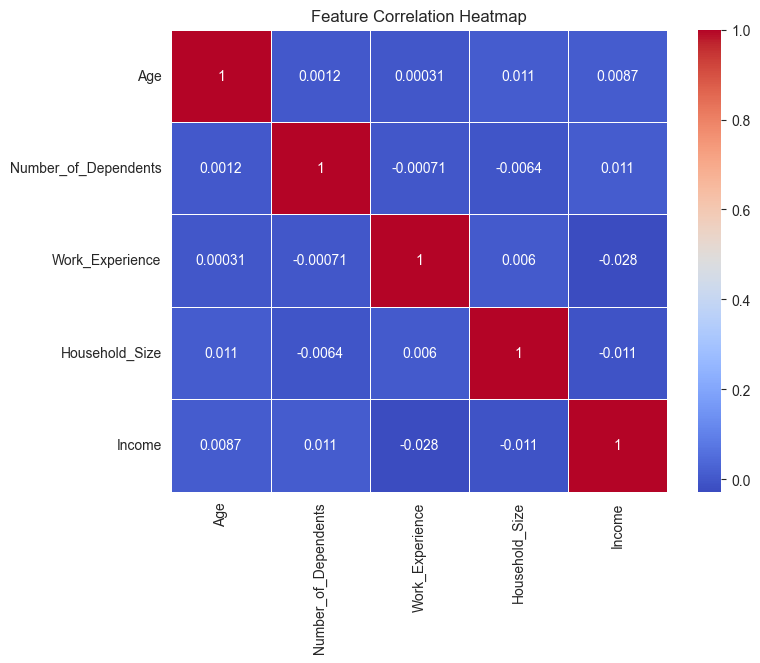

In [18]:
df_numeric = df.select_dtypes(include=[float, int])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#### 4.2.3 Income vs. Work Experience

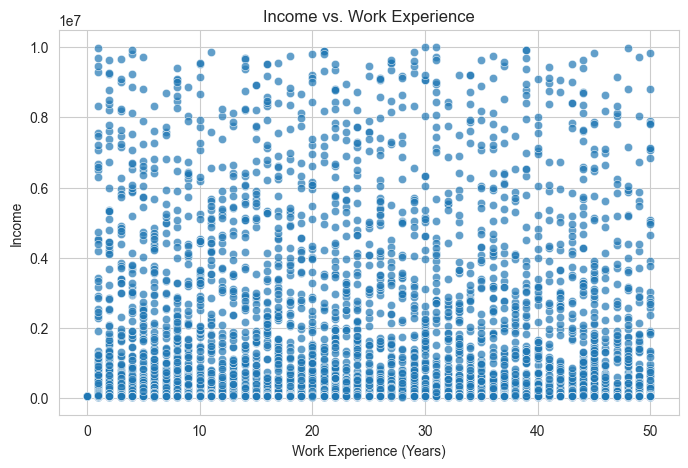

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Work_Experience", y="Income", data=df, alpha=0.7)
plt.title("Income vs. Work Experience")
plt.xlabel("Work Experience (Years)")
plt.ylabel("Income")
plt.show()

### 4.3. Multivariate Analysis

**Objective:**
- Analyze interactions between multiple variables to understand complex relationships.

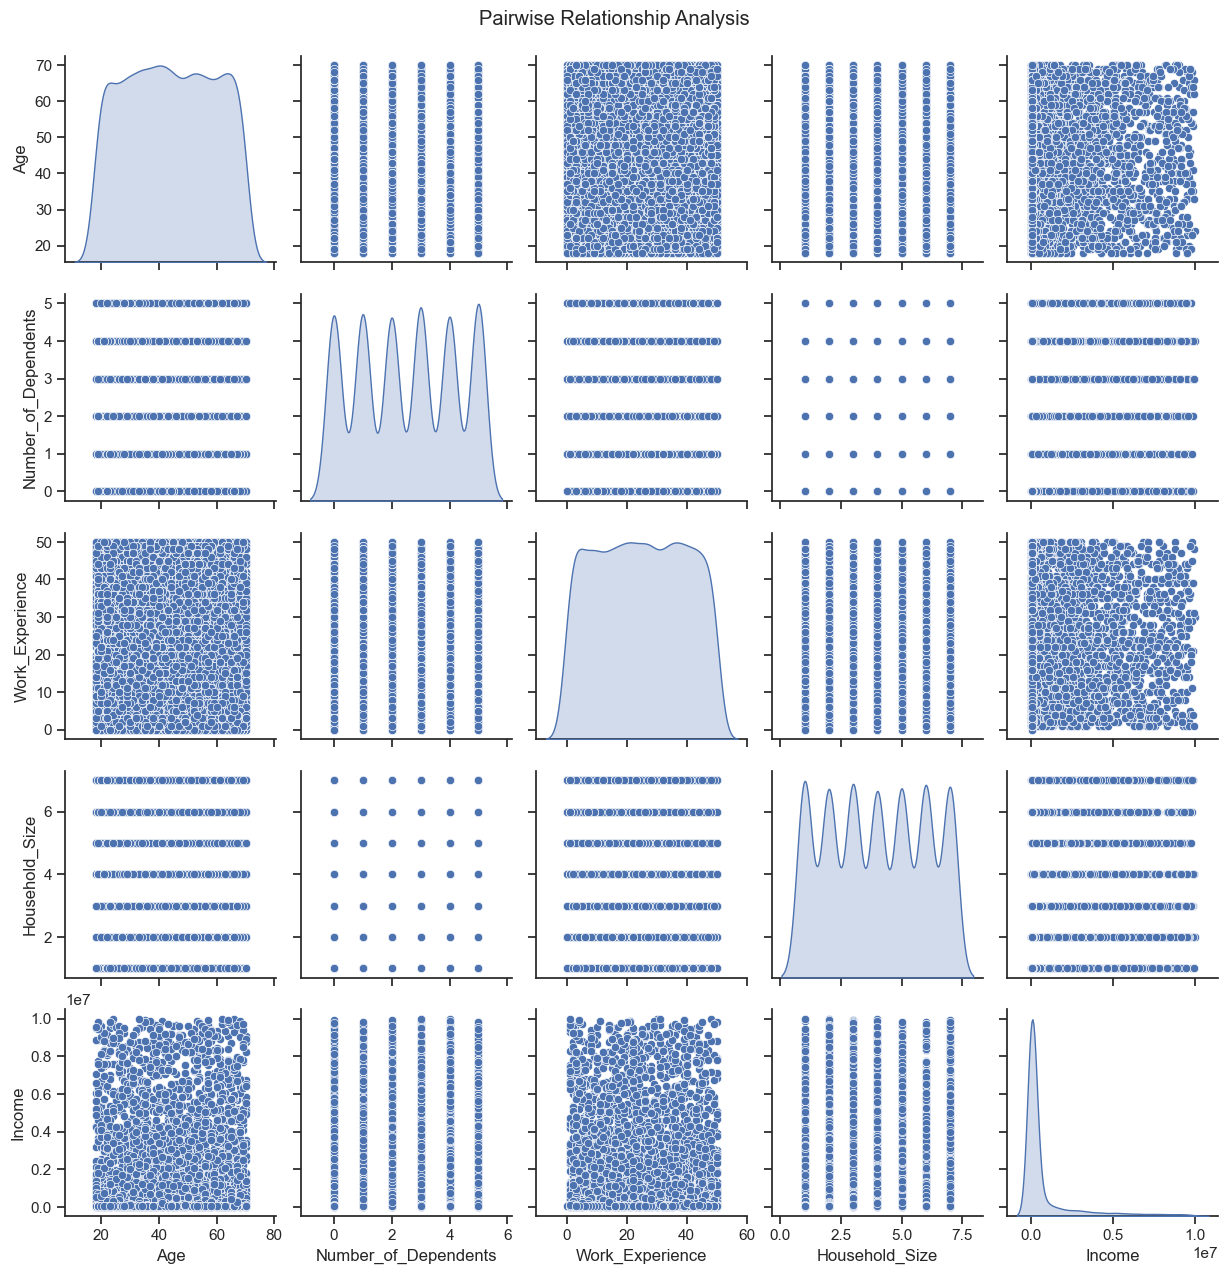

In [20]:
sns.set(style="ticks")
sns.pairplot(df, diag_kind="kde")
plt.suptitle('Pairwise Relationship Analysis', y=1.02)
plt.show()


In [21]:
#### 4.3.2 Work Experience, Occupation & Income

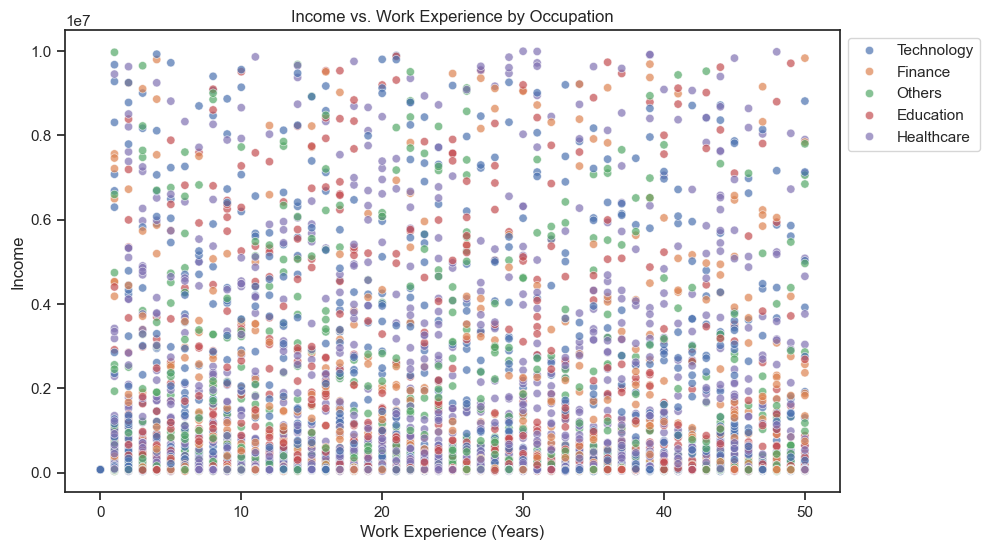

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Work_Experience", y="Income", hue="Occupation", data=df, alpha=0.7)
plt.title("Income vs. Work Experience by Occupation")
plt.xlabel("Work Experience (Years)")
plt.ylabel("Income")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In [23]:
#### 4.2.3 Cluster Analysis: Income, Education Level, and Marital Status

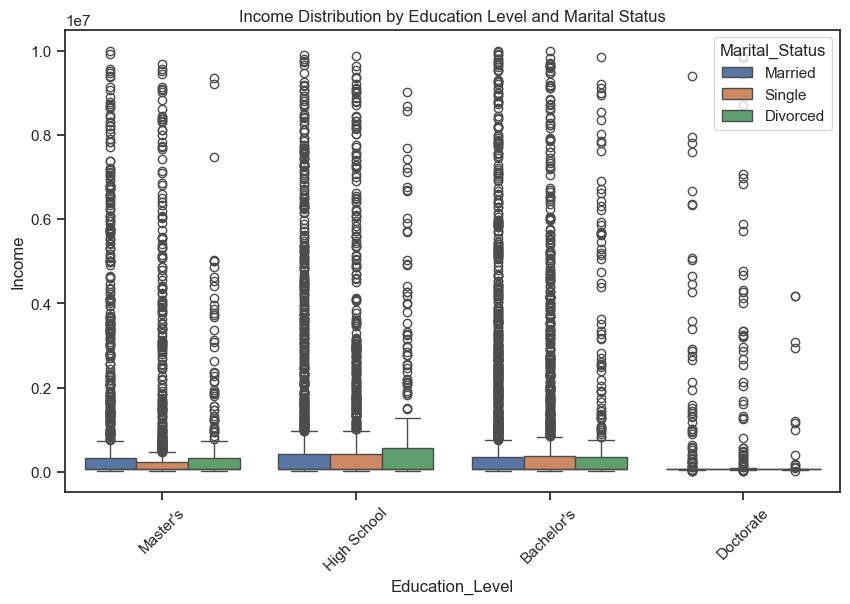

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Education_Level", y="Income", hue="Marital_Status", data=df)
plt.title("Income Distribution by Education Level and Marital Status")
plt.xticks(rotation=45)
plt.show()

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.